In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, neighbors, metrics
from matplotlib import patches, cm
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm, tnrange, tqdm_notebook
my_colors = [(1, 0, 0),(0, 0, 1)]
my_cm = LinearSegmentedColormap.from_list('my_cm', my_colors, N=2)

## Data generation

In [2]:
np.random.seed(2020) # Don't change the seed in your firt experiment. Feel free to play with it later on
N = 50 # number of data points; don't change initially, but feel free to play with it later on
blue_data = np.random.multivariate_normal([2.5,0],[[2,1],[1,2]],N)
blue_labels = 1 * np.ones((N,1)) # coding blue label as one
red_data = np.random.multivariate_normal([0,2.5],[[2,1],[1,2]],N)
red_labels = 0 * np.ones((N,1)) # coding red label as zero
data = np.concatenate((blue_data,red_data),axis=0)
labels = np.concatenate((blue_labels,red_labels),axis=0)

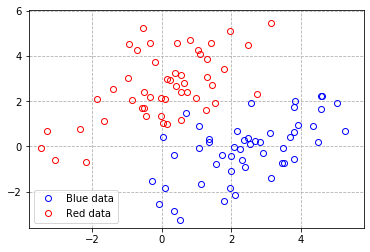

In [3]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
plt.grid(b=True,linestyle="--")
leg = plt.legend(loc = "lower left")

## Mesh grid to evaluate classifier

In [4]:
# Need to create a mesh to evaluate classifier
x_grid = np.linspace(1.5*np.min(data[:,0]),1.5*np.max(data[:,0]),100)
y_grid = np.linspace(1.5*np.min(data[:,1]),1.5*np.max(data[:,1]),100)
x_mesh, y_mesh = np.meshgrid(x_grid,y_grid)

In [5]:
from scipy.stats import multivariate_normal

sigma_blue = np.array([[2,1],[1,2]])
mu_blue = np.array([2.5,0])

sigma_red = np.array([[2,1],[1,2]])
mu_red = np.array([0,2.5])

def eval_pdf(xcoord,ycoord,sigma,mu):
    return multivariate_normal.pdf(np.array([xcoord,ycoord]).T,mean=mu,cov=sigma)

def BayesPredict(xcoord,ycoord):
    pred = np.zeros(xcoord.shape)
    p_blue = eval_pdf(xcoord,ycoord,sigma=sigma_blue,mu=mu_blue)
    p_red = eval_pdf(xcoord,ycoord,sigma=sigma_red,mu=mu_red)
    return((p_blue>p_red).astype(int))

prediction = BayesPredict(x_mesh.ravel(),y_mesh.ravel())
prediction = prediction.reshape(x_mesh.shape)
print(prediction.shape)

(100, 100)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


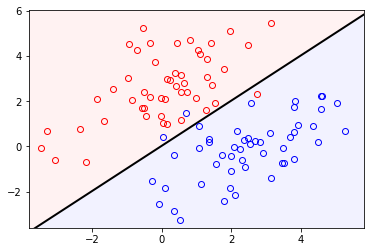

In [6]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
Bayes = plt.contourf(x_mesh,y_mesh,prediction,levels = [-1,0,1,2],cmap=my_cm,alpha=0.05)
Bayes = plt.contour(x_mesh,y_mesh,prediction,[-1,0,1,2],linewidths=2,colors='k')
#plt.savefig('bayesclassifier.pdf')